<a href="https://colab.research.google.com/github/ilidan16/ilidan16/blob/master/mandelbrot_parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.307714462280273
5.211726665496826


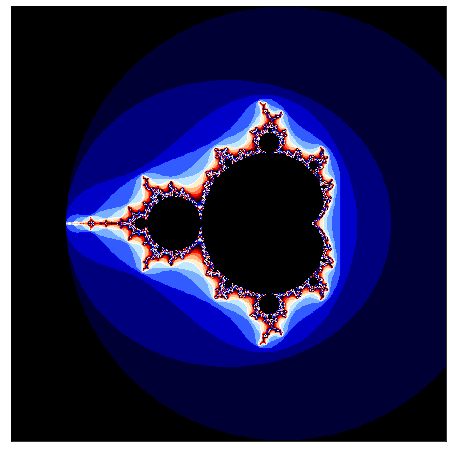

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.colors as clr

from multiprocessing import Pool
from multiprocessing import Thread
#=============================================================================
# Поиск красивых мест: https://mandel.gart.nz/
"""
x = -1.748187465
y = 0.001251896
zoom = 711920010
d = 1600/zoom
xmin = x-d/2
xmax = x+d/2
ymin = y-d/2
ymax = y+d/2
"""
#'''
xmin = -2.5
xmax = 1.5
ymin = -2
ymax = 2
#'''

half_x = (xmin + xmax)/2
m = 500
n = 500
itr = 200
border = 2.0
#=============================================================================
def mandelbrot_cycle(xmin,xmax,m,n, ymin=ymin, ymax=ymax, itr=itr, border=border):
    image = np.zeros((m, n))
    for i_y, y in enumerate(np.linspace(ymin, ymax, m)):
        for i_x, x in enumerate(np.linspace(xmin, xmax, n)):
            c = x + y * 1j
            z = 0
            for k in range(itr):
                z = z**2 + c
                if abs(z) > border:
                    image[i_y,i_x] = k
                    break
    return image
#=============================================================================
def mandelbrot_numpy(xmin,xmax,m,n, ymin=ymin, ymax=ymax, itr=itr, border=border):
    image = np.zeros((m, n))
    x, y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(m*1j)]
    c = x + 1j * y
    z = np.zeros_like(c)
    for k in range(itr):
        z = z * z + c
        mask = (np.abs(z) > border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan

    return image.T
#=============================================================================
t0 = time.time()
if __name__ == '__main__':
    two_images = Pool().starmap(slow_mandelbrot, [(xmin,half_x,m,int(n/2)),
                                             (half_x,xmax,m,int(n/2))])

    full_image = np.concatenate((two_images[0], two_images[1]), axis=1) #склеиваем
print(time.time() - t0)

t0 = time.time()
mandelbrot_cycle(xmin,xmax,m,n)
print(time.time() - t0)


    

plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(-full_image, cmap='flag')
plt.show()